In [1]:
# Building a Logistic Regression in Python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv('ex2data1.txt', header=None)
data.head(3)

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0


In [4]:
X = data[[0,1]].values
y = data[2]

In [5]:
# use LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
# Predict class labels for samples in X
log_reg_pred = log_reg.predict(X)
log_reg_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [7]:
# Probability estimates.
log_reg.predict_proba(X[:10, :]) 

array([[0.53704829, 0.46295171],
       [0.79800178, 0.20199822],
       [0.56471269, 0.43528731],
       [0.25141181, 0.74858819],
       [0.1860787 , 0.8139213 ],
       [0.60341331, 0.39658669],
       [0.19106567, 0.80893433],
       [0.39446729, 0.60553271],
       [0.14963269, 0.85036731],
       [0.33257341, 0.66742659]])

In [8]:
# Returns the mean accuracy on the given test data and labels.
log_reg.score(X, y)

0.87

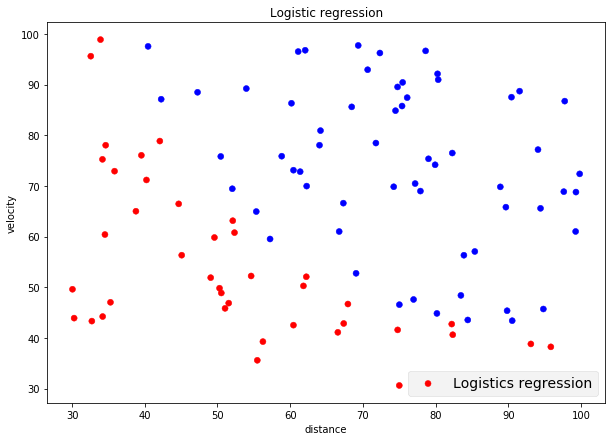

In [9]:
# Plot data
fig = plt.figure(figsize=(10,7))
plt.title("Logistic regression")
plt.style.use(plt.style.available[4])
colors=['red' if l==0 else 'blue' for l in y]
plt.scatter(X[:, 0], X[:, 1], label='Logistics regression', color=colors)
plt.legend(loc='lower right');
plt.xlabel("distance")
plt.ylabel("velocity")
plt.show()

In [10]:
from sklearn.metrics import accuracy_score 

In [11]:

accuracy = accuracy_score(y, log_reg_pred)
# Coefficient of the features in the decision function. (from theta 1 to theta n)
parameters = log_reg.coef_[0]
# Intercept (a.k.a. bias) added to the decision function. (theta 0)
parameter0 = log_reg.intercept_

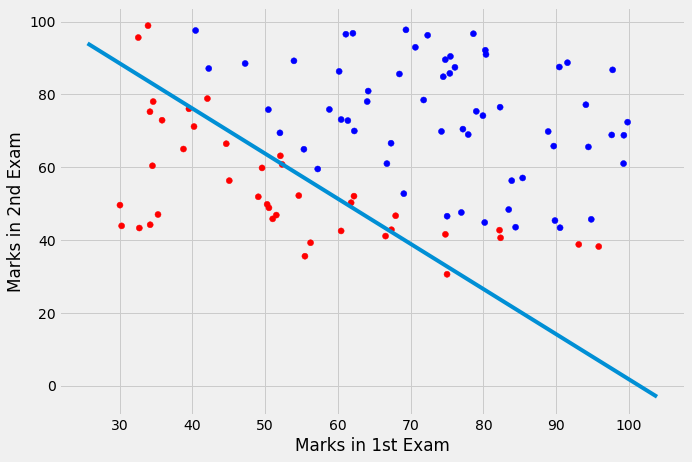

In [12]:
# Plotting the decision boundary
fig = plt.figure(figsize=(10,7))
x_values = [np.min(X[:, 1] -5 ), np.max(X[:, 1] +5 )]
# calcul y values
#y_values = - (parameter0 + np.dot(parameters[0], x_values)) / parameters[1]
y_values = np.dot((-1./parameters[1]), (np.dot(parameters[0],x_values) + parameter0))
colors=['red' if l==0 else 'blue' for l in y]
plt.scatter(X[:, 0], X[:, 1], label='Logistics regression', color=colors)
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.show()